<a href="https://colab.research.google.com/github/nurfnick/Discrete_Math/blob/master/ProjectPart4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Part # 4 : CPSMA 3133 [Dr. Jacob's](https://github.com/nurfnick) Discrete Mathematics 

## Logic and Proof

### Me!




## 1 Logic

I will establish some propositions about my daily activities.

In [1]:
WillGoToBedEarly = True
WillEatHealthy = False
WillGoToTheGym = True
WillTakeALongBath = False
WillCleanTheKitchen = True
WillFoldLaundry = False


Please don't use mine!!!  Make up your own, be creative!  I will not give full marks for my work!!!

$$\lnot q$$

In [6]:
not(WillGoToBedEarly)

False

$$q \land p$$

In [7]:
WillCleanTheKitchen and WillGoToTheGym

True

$$ q \lor p$$

In [8]:
WillEatHealthy or WillCleanTheKitchen

True

I don't see a clever way to do $p\Rightarrow q$ so I'll do the equivalent 
$ \lnot p \lor q$ and make my own function to do it!

In [9]:
def implies(p,q):
  return not(p) or q

implies(WillEatHealthy,WillCleanTheKitchen)

True

I have the same issue with XOR, there is not a build in the python logical but there is one in the python bitwise logical `^`

In [4]:
print(True ^ False)
print(False ^ False)
print(True ^ True)

True
False
False


You may use this one or try to define your own function that does it, $a\oplus b \equiv \left(a\land \lnot b\right)\lor \left(\lnot a \land b\right)$.   Just be aware that passing integers to the `^` will do unexpected things!

In [5]:
2^8

10

To develop the truth tables, I'll need to start with propositions not initialized to already have a truth value.  Let's play with the truth table for
$$ \left(\lnot r \lor p\right) \Rightarrow \left(q \land p\right)$$

The real trick to a truth table is to iterate through every possible truth value.  I do that with for loops below.  

A more clever programmer could do this bitwise using python's bitwise `&|~` bitwise `and` `or` and `not` 

In [16]:
values = [True,False]
table = []

for r in values:
  for p in values:
    for q in values: 
      row =[]
      row.append(r)
      row.append(p)
      row.append(q)
      row.append(not(r))
      row.append(not(r) and p)
      row.append(q and p)
      row.append(implies(not(r) and p,q and p))
      table.append(row)




In [29]:
import pandas as pd

df = pd.DataFrame(table,columns = ['r','p','q','$\lnot r$','$\lnot r \lor p$',r'$q\land p$',r'$\left(\lnot r \lor p\right) \Rightarrow \left(q \land p\right)$'] )
df

,r,p,q,$\lnot r$,$\lnot r \lor p$,$q\land p$,$\left(\lnot r \lor p\right) \Rightarrow \left(q \land p\right)$
0,True,True,True,False,False,True,True
1,True,True,False,False,False,False,True
2,True,False,True,False,False,False,True
3,True,False,False,False,False,False,True
4,False,True,True,True,True,True,True
5,False,True,False,True,True,False,False
6,False,False,True,True,False,False,True
7,False,False,False,True,False,False,True


So I thought `pandas` would render my $\LaTeX$ code in the column names but it doesn't look like it is supported.  I'll export this table then into the native language of Jupyter, `markdown`, and copy paste the table.

In [31]:
print(df.to_markdown(index = False))

|   r |   p |   q |   $\lnot r$ |   $\lnot r \lor p$ |   $q\land p$ |   $\left(\lnot r \lor p\right) \Rightarrow \left(q \land p\right)$ |
|----:|----:|----:|------------:|-------------------:|-------------:|-------------------------------------------------------------------:|
|   1 |   1 |   1 |           0 |                  0 |            1 |                                                                  1 |
|   1 |   1 |   0 |           0 |                  0 |            0 |                                                                  1 |
|   1 |   0 |   1 |           0 |                  0 |            0 |                                                                  1 |
|   1 |   0 |   0 |           0 |                  0 |            0 |                                                                  1 |
|   0 |   1 |   1 |           1 |                  1 |            1 |                                                                  1 |
|   0 |   1 |   0 |        

|   r |   p |   q |   $\lnot r$ |   $\lnot r \lor p$ &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;  &nbsp;|   $q\land p$ &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;  &nbsp;|   $\left(\lnot r \lor p\right) \Rightarrow \left(q \land p\right)$&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;  |
|:----:|:----:|:----:|:------------:|:-------------------:|:-------------:|:-------------------------------------------------------------------:|
|   1 |   1 |   1 |           0 |                  0 |            1 |                                                                  1 |
|   1 |   1 |   0 |           0 |                  0 |            0 |                                                                  1 |
|   1 |   0 |   1 |           0 |                  0 |            0 |                                                                  1 |
|   1 |   0 |   0 |           0 |                  0 |            0 |                                                                  1 |
|   0 |   1 |   1 |           1 |                  1 |            1 |                                                                  1 |
|   0 |   1 |   0 |           1 |                  1 |            0 |                                                                  0 |
|   0 |   0 |   1 |           1 |                  0 |            0 |                                                                  1 |
|   0 |   0 |   0 |           1 |                  0 |            0 |                                                                  1 |


Copy paste was not enough, I had to manually change widths and alignment. 

Okay so I spent way too long making this look 'nice'.  I do not expect you to make a perfect table like mine but return something descriptive and it will be great!

## 2 Proof

I am going to prove that the roots of 
$$ y = x^2+3x-4$$
are $(1,0)$ and $(-4,0)$.

But first we graph!  Well plot is the right word...

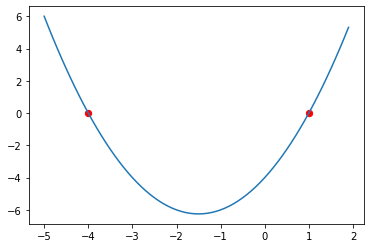

In [46]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(-5,2,.1) #first value, last value, stepsize = .1

plt.plot(x,x**2+3*x-4)
plt.scatter(1,0, c='red',s = 40)#plotting the points too x,y,color,size
plt.scatter(-4,0,c='red',s = 40)
plt.show()

Now for the proof!

To be a root of the equation, the point must be of the form $(r,0)$.  Both of these satisfy this requirement.  So the points are both candidates for roots but now we need to check that they are indeed roots!

So I'll ask here is it true that $0 = 1^2+3*1-4$?

Let's have python check!

In [1]:
0 == 1**2+3*1-4

True

Sweet!

I now do the same for $0 = \left(-4\right)^2+3(-4)-4$ 

In [2]:
0==(-4)**2+3*(-4)-4

True

This completes the proof as I have shown that both are roots of the equation! Q.E.D.